<a href="https://colab.research.google.com/github/Pdugovich/DS-Unit-2-Kaggle-Challenge/blob/master/module1/assignment_kaggle_challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 1

## Assignment
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what other columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What other columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 102kB 2.7MB/s 


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [6]:
train.shape

(59400, 41)

In [5]:
test.shape

(14358, 40)

In [9]:
train.describe(exclude='number').nunique()

date_recorded            4
funder                   4
installer                4
wpt_name                 4
basin                    4
subvillage               4
region                   4
lga                      4
ward                     4
public_meeting           4
recorded_by              3
scheme_management        4
scheme_name              4
permit                   4
extraction_type          4
extraction_type_group    4
extraction_type_class    4
management               4
management_group         4
payment                  4
payment_type             4
water_quality            4
quality_group            4
quantity                 4
quantity_group           4
source                   4
source_type              4
source_class             4
waterpoint_type          4
waterpoint_type_group    4
status_group             4
dtype: int64

### Data Exploration

In [10]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [0]:
train['id'].value_counts()

In [0]:
# 0s make sense here
train['amount_tsh'].value_counts()

In [0]:
# 1812 0s here. need to fix that.
train['longitude'].value_counts()

In [0]:
# 1812 -2.000000e-08
train['latitude'].value_counts()

In [0]:
#There are a lot of 0s here, but there is no description of the data
# so I can't say if it makes sense or not
train['num_private'].value_counts()

In [0]:
# The data is vague enough to where 0 population surrounding the
#well is conceivable
train['population'].value_counts()

In [0]:
# A ton of wells where year of construction is unknown.
train['construction_year'].value_counts()

In [0]:
# there could be a 0 district, and there are very few 0s here.
train['district_code'].value_counts()

In [0]:
# Numeric Columns to clean
numeric_to_clean = ['longitude','latitude','construction_year']

In [14]:
train.select_dtypes(exclude='number').nunique()

date_recorded              356
funder                    1897
installer                 2145
wpt_name                 37400
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [0]:
train.isnull().sum()

In [32]:
# the numeric items seem free from duplicates
train.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


In [34]:
# Checking for duplicat columns
duplicates1 = ['extraction_type','extraction_type_group','extraction_type_class']
duplicates2 = ['payment','payment_type']
duplicates3 = ['quantity_group','quantity']
duplicates4 = ['source','source_type']
duplicates5 = ['waterpoint_type','waterpoint_type_group']
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [42]:
train['ward'].describe()

count     59400
unique     2092
top       Igosi
freq        307
Name: ward, dtype: object

In [43]:
#It looked like lga and ward may have been duplicates, but they are not
train['lga'].describe()

count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object

In [39]:
#Checking the duplicates to decide which to keep
duplicate_lists = [duplicates1, duplicates2, duplicates3, duplicates4,
                   duplicates5]

for duplicate in duplicate_lists:
  print(train[duplicate].describe())
  print("")

       extraction_type extraction_type_group extraction_type_class
count            59400                 59400                 59400
unique              18                    13                     7
top            gravity               gravity               gravity
freq             26780                 26780                 26780

          payment payment_type
count       59400        59400
unique          7            7
top     never pay    never pay
freq        25348        25348

       quantity_group quantity
count           59400    59400
unique              5        5
top            enough   enough
freq            33186    33186

        source source_type
count    59400       59400
unique      10           7
top     spring      spring
freq     17021       17021

           waterpoint_type waterpoint_type_group
count                59400                 59400
unique                   7                     6
top     communal standpipe    communal standpipe
freq                

In [0]:
#Looking at the above lists, I'll remove the duplicate columns
# and nearly duplicate columns that have fewer unique variables

duplicates_to_drop = ['extraction_type_group','extraction_type_class',
                    'payment_type','quantity_group', 'source_type',
                    'waterpoint_type_group']

### Splitting train data into train and val

In [0]:
from sklearn.model_selection import train_test_split

my_train, my_val = train_test_split(train, random_state=333)

### Wranging data with function 



In [0]:
import numpy as np
def wrangle(X):
  
  # To prevent copy warnings
  X = X.copy()

  # Latitude is strange in that it doesn't have any 0s, but it does have these
  # near-0 values
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  # there are numeric columns with 0s that should be nana
  nans_as_zeros = ['latitude','longitude','construction_year']
  for column in nans_as_zeros:
    X[column] = X[column].replace(0, np.nan)
  
  #Date recorded is treated as an int. Switching to just the year 
  X['date_recorded'] = pd.to_datetime(X['date_recorded']).dt.year

  #Removing duplicate or near-duplicate columns
  X = X.drop(columns=duplicates_to_drop)

  #Can be used for each train and validation
  return X

In [0]:
my_train = wrangle(my_train)
my_val = wrangle(my_val)
test = wrangle(test)

### Feature Selection

In [0]:
# Selecting target

target = 'status_group'

#Removing the target and useless id columns
train_columns = my_train.drop(columns=[target,'id'])

# separating numeric columns to readd after
numeric_columns = train_columns.select_dtypes(include='number').columns.tolist()

#Getting a list of cardinality for categorical features to exclude the large
cardinality = train_columns.select_dtypes(exclude='number').nunique()

#Excluding features with a cardinality over 50
categorical_columns = cardinality[cardinality <50].index.tolist()

#combining lists to get the features I will use for my model
features = numeric_columns + categorical_columns

In [0]:
#Assigning variables

X_train = my_train[features]
y_train = my_train[target]

X_val = my_val[features]
y_val = my_val[target]

X_test = test[features]

### making pipeline

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# Making a pipeline to encode, impute, then classify the data using decisiontree
my_pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    DecisionTreeClassifier(max_depth = 20, min_samples_leaf=13,
                           random_state=333)
)

In [120]:
# fitting model to the data
my_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'recorded_by', 'scheme_management',
                                     'permit', 'extraction_type', 'management',
                                     'management_group', 'payment',
                                     'water_quality', 'quality_group',
                                     'quantity', 'source', 'source_class',
                                     'waterpoint_type'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='va...
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=20, max_features=None,
           

In [121]:
#Checking training accuracy first
#Changing max depth reduced training accuracy but increased validation accuracy
#Looks like max depth=20 is the best I can do with that parameter
#Changing the min_sample_leaf to 13 helped as well
print('Training Accuracy')
print(my_pipeline.score(X_train,y_train))

Training Accuracy
0.8126599326599326


In [122]:
#Now checking the validation accuracy
# Looks like 76.71% is the best I am getting with these features/parameters

print('Validation Accuracy')
print(my_pipeline.score(X_val,y_val))

Validation Accuracy
0.7670707070707071


### Plotting feature importances

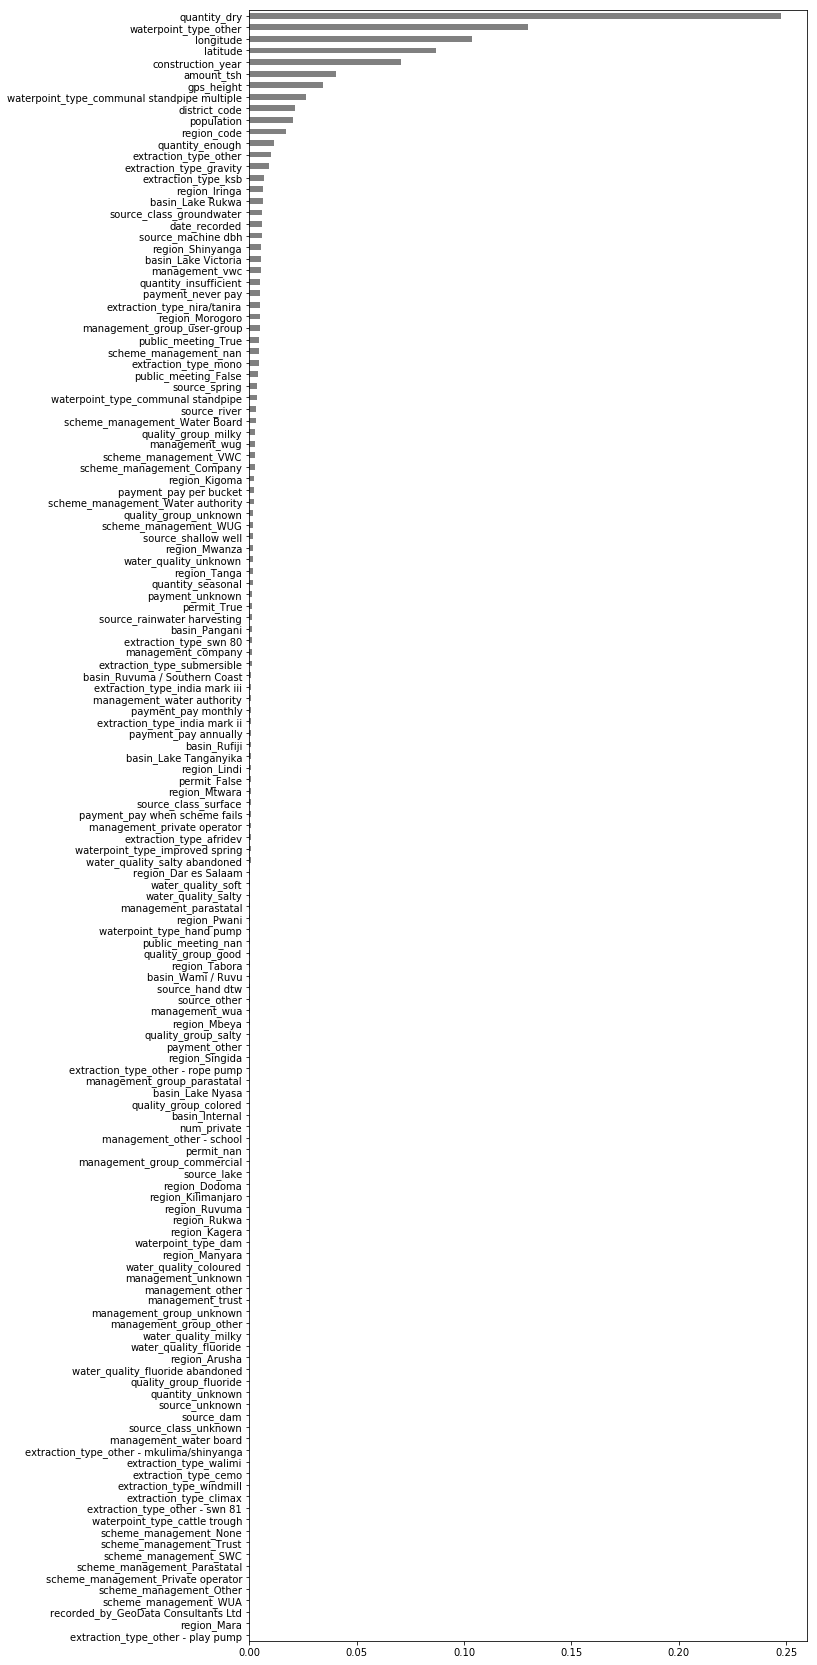

In [124]:
import matplotlib.pyplot as plt

#pulling the classifier and encoder from the pipeline to use
model = my_pipeline.named_steps['decisiontreeclassifier']
encoder = my_pipeline.named_steps['onehotencoder']

#Transforming the features in X_val to plot importance
encoded_columns = encoder.transform(X_val).columns

#Making a series of importance per feature
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='grey');

### Test model

In [0]:
pred_y_test = my_pipeline.predict(X_test)

In [127]:
pred_y_test

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [0]:
decisiontree_submission = test.copy()

In [0]:
decisiontree_submission['status_group'] = pred_y_test

In [0]:
decisiontree_submission = decisiontree_submission.filter(['id','status_group'])

In [0]:
decisiontree_submission

In [0]:
decisiontree_submission.to_csv('decisiontree_submission.csv',index=False)